In [1]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Step1 : Import and split the data

In [2]:
df= pd.read_csv('final_train.csv')

In [3]:
df_copy_train=df

In [4]:
df=df.drop('+/-',axis=1)
df=df.drop('W/L',axis=1)
df=df.drop('GAME DATE',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('TEAM',axis=1)
df=df.drop('OPP',axis=1)

In [5]:
df

,MIN,EFG%,FTA RATE,TOV%,OREB%,OPP_EFG%,OPP_FTA RATE,OPP_TOV%,OPP_OREB%,Home/Away,REST,OPP_REST
0,48,0.607,0.293,0.140,0.167,0.537,0.195,0.144,0.171,1,0,0
1,48,0.537,0.195,0.144,0.171,0.607,0.293,0.140,0.167,0,0,0
2,48,0.420,0.230,0.179,0.245,0.548,0.202,0.141,0.275,0,0,0
3,48,0.512,0.212,0.159,0.190,0.541,0.265,0.137,0.438,1,0,0
4,48,0.541,0.265,0.137,0.438,0.512,0.212,0.159,0.190,0,0,0
5,48,0.548,0.202,0.141,0.275,0.420,0.230,0.179,0.245,1,0,0
6,48,0.429,0.283,0.101,0.096,0.494,0.398,0.224,0.282,1,0,0
7,48,0.494,0.351,0.186,0.244,0.547,0.302,0.138,0.244,1,0,0
8,48,0.547,0.302,0.138,0.244,0.494,0.351,0.186,0.244,0,0,0
9,48,0.552,0.314,0.146,0.263,0.573,0.247,0.154,0.275,0,0,0


In [6]:
X_train=df.values
X_train=X_train[:2000,]

In [7]:
y1_train=df_copy_train.values[:,-2]
y1_train=y1_train.astype('int')
y1_train=y1_train[:2000,]
y2_train=df_copy_train.values[:,-1]
y2_train=y2_train.astype('int')
y2_train=y2_train[:2000,]

In [8]:
df= pd.read_csv('final_test.csv')

In [9]:
df_copy_test=df

In [10]:
df=df.drop('+/-',axis=1)
df=df.drop('W/L',axis=1)
df=df.drop('GAME DATE',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('TEAM',axis=1)
df=df.drop('OPP',axis=1)

In [11]:
X_test=df.values
X_test=X_test[2000:,]

In [12]:
y1_test=df_copy_test.values[:,-2]
y1_test=y1_test.astype('int')
y1_test=y1_test[2000:,]
y2_test=df_copy_test.values[:,-1]
y2_test=y2_test.astype('int')
y2_test=y2_test[2000:,]

# Important features selection

In [13]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets

model = ExtraTreesClassifier()
model.fit(X_train, y1_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.          0.24269592  0.06132108  0.07963594  0.07050415  0.22568503
  0.06899063  0.07486468  0.06926509  0.02896346  0.04065247  0.03742155]


# Step 2: Fit in  Logistic Model

# Select best hyperparameters

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

params = {'C': [0.01, 0.1, 0.8, 0.9, 1,10,20],
          'penalty': ['l1','l2'], 
          'class_weight':['balanced', None]}
          
          
LRgrid =GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring = 'accuracy')
LRgrid.fit(X_train, y1_train)
print('The best score is', LRgrid.best_score_)
print('The best parameters are', LRgrid.best_params_)

The best score is 0.945
The best parameters are {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}


# Confusion Matrix Accuracy

In [21]:
lr=LogisticRegression(penalty = 'l1', class_weight = 'balanced', C = 10)
lr.fit(X_train, y1_train)
y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[152  78]
 [ 78 152]]


# ROC Curve Accuracy

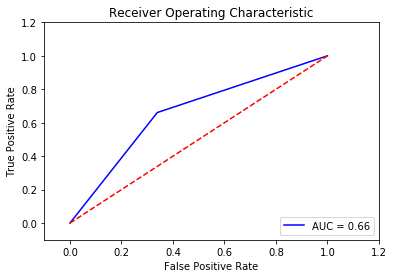

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Step 3: Fit in Random Forest Classifier

# Select best hyperparameters

In [17]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()


params = {'n_estimators':[10,20,30,40],'max_depth': [2, 4, 8, 16], 'min_samples_leaf':[2, 4, 8],'max_features': [0.2,0.3,0.4, 0.8,1.0]}

RFgrid = RandomizedSearchCV(param_distributions = params,
                            estimator=clf, 
                            cv=5, scoring = 'accuracy', n_iter=1)
RFgrid.fit(X_train,y1_train)
print('The best score is', RFgrid.best_score_)
print('The best parameters are', RFgrid.best_params_)

The best score is 0.865
The best parameters are {'n_estimators': 30, 'min_samples_leaf': 8, 'max_features': 0.2, 'max_depth': 16}


# Confusion Matrix Accuracy

In [18]:
rf = RandomForestClassifier(n_estimators = 30, min_samples_leaf = 4,max_features = 0.4, max_depth = 16)
rf.fit(X_train, y1_train)
y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y1_test,y_pred)
print(cm)

[[145  85]
 [ 86 144]]


# ROC Curve Accuracy

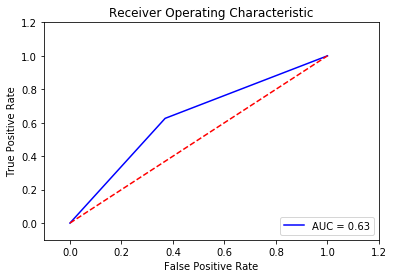

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
actual = y1_test
predictions=y_pred
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()